## Student Performance Indicator

#### Life cycle of Machine Learning project
- understanding  the problem statement
- data collection
- data checks to perform
- exploratory data analysis
- data pre-processing
- model training
- choose best model

#### 1) Problem Statement
- This project understands how the student`s performance(test score) is affected by other variables such as Gender, Ethinicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection
- dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- the data consists of 8 column and 1000 rows

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas Dataframe 

In [3]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

#### 2.2 Dataset Information
- gender : sex of students -> (Male/Female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parent&#96;s final education -> (bachelor&#96;s degree,some collage,master&#96;s degree,associate&#96;s degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score  

#### Data Checks to perform
- check missing values
- check duplicates
- check data type
- check number of unique values of each column
- check statistics of data set
- check various categories present in different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in data set

#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### there are no duplicates values in data set

#### 3.3 Check data types

In [8]:
# check null  and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- from above description of numerical data, all means are very close to each other - between 66 and 69.16;
- all standard deviations are also close - between 14.6 and 15.2;
- while there is a minimun score 0 for math, for writing minimun is much higher = 10 and for reading yet higher = 17  

#### 3.7 Exploring Data

In [11]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [12]:
print("categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:    ['none' 'completed']


In [13]:
# define numerical and categorical columns
numeric_features =  [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features =  [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))    

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Number of students with full mark

In [15]:
math_full = df[df['math_score'] == 100].shape[0]
print(f'Number of students with full marks in Maths: {math_full}')

writing_full = df[df['writing_score'] == 100].shape[0]
print(f'Number of students with full marks in Writing: {writing_full}')

reading_full = df[df['reading_score'] == 100].shape[0]
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


#### Number of students with less than 20 mark

In [16]:
math_less_20 = df[df['math_score'] <= 20].shape[0]
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')

writing_less_20 = df[df['writing_score'] <= 20].shape[0]
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')

reading_less_20 = df[df['reading_score'] <= 20].shape[0]
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights
- from above values we get students have performed worst in Maths
- best performance is in Reading section

#### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distributionn to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

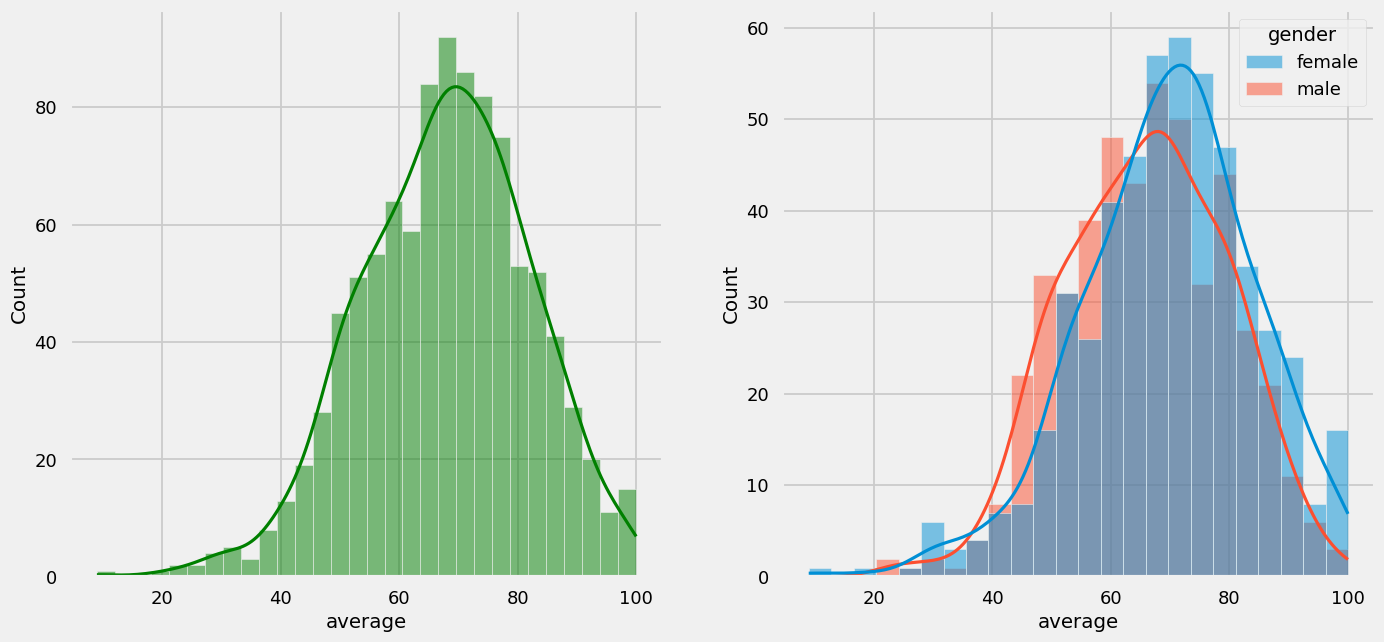

In [116]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

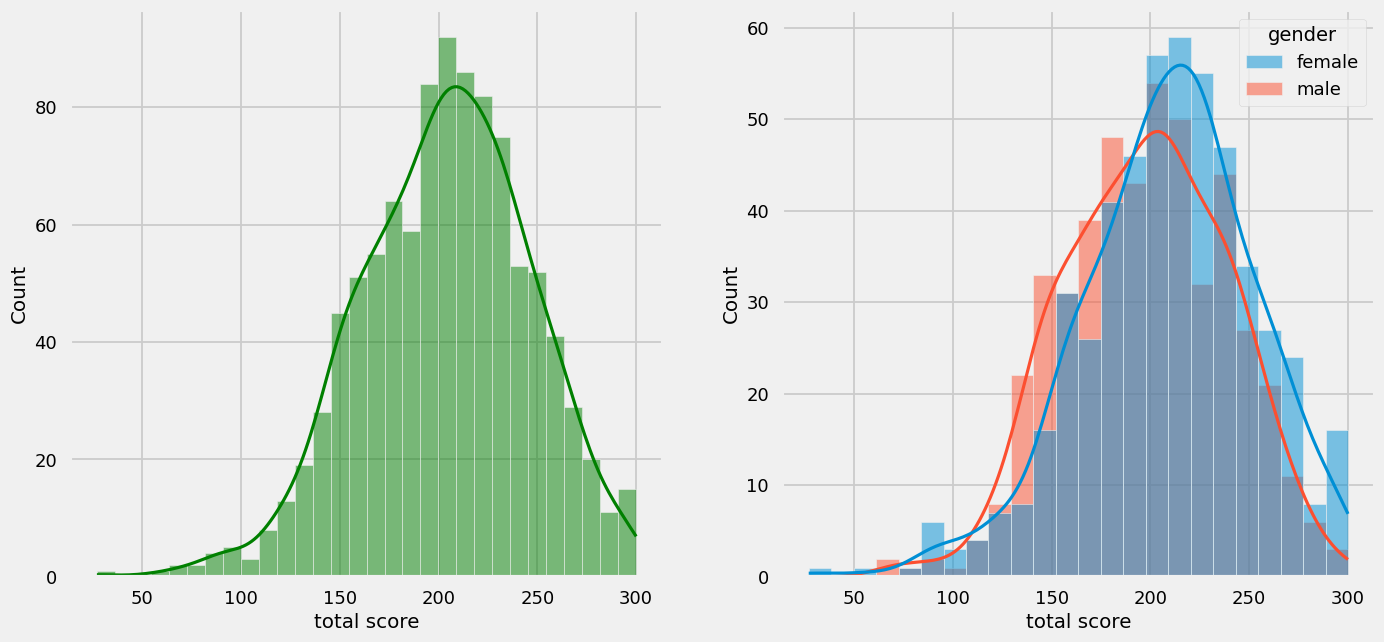

In [115]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#### Insights
- Female students tend to perform well then male students.

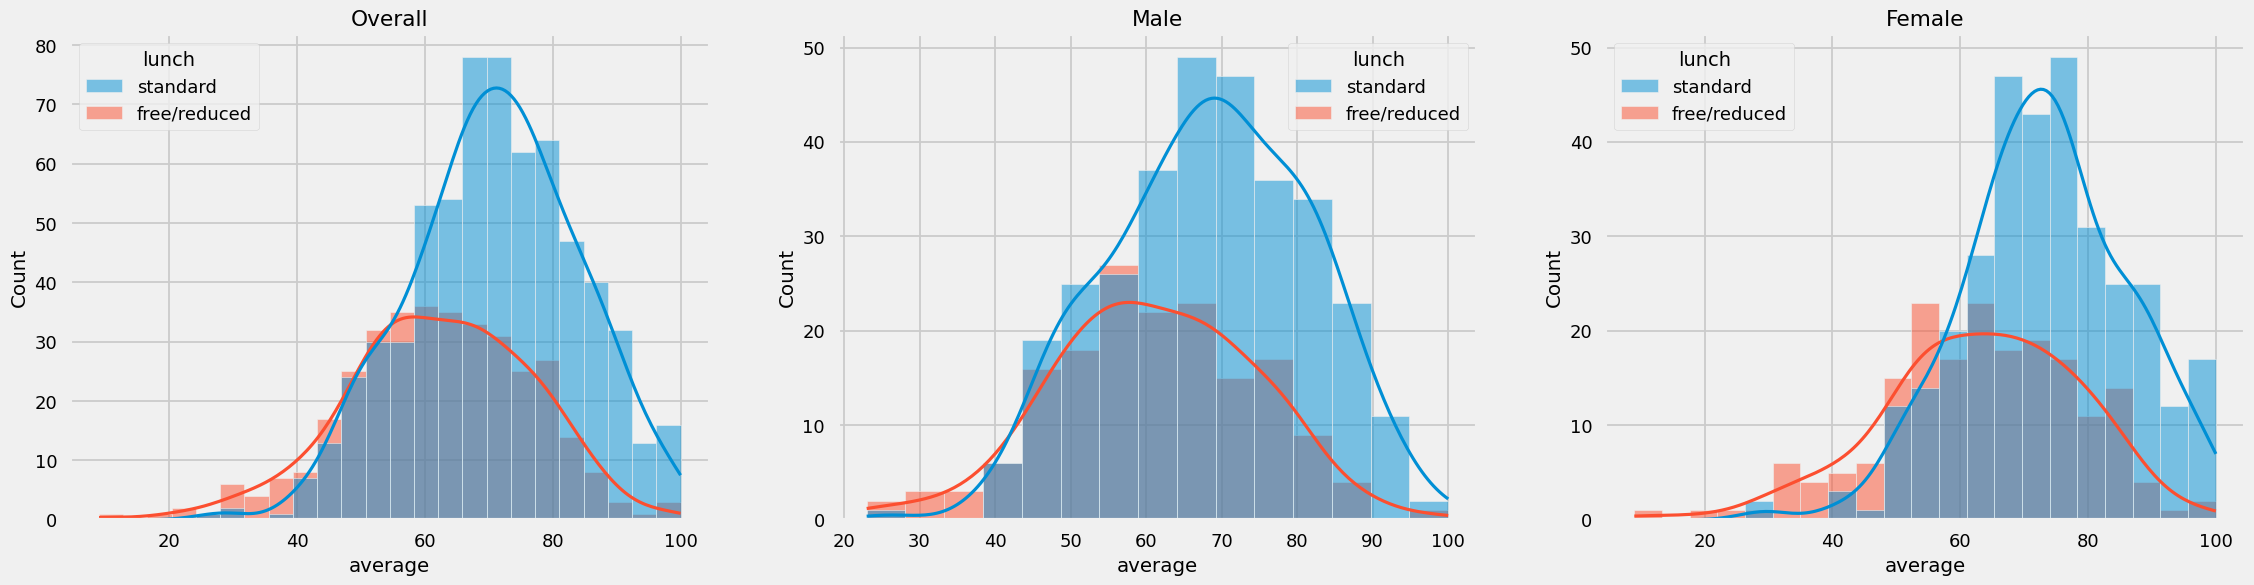

In [130]:
hue_order = df['lunch'].unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch',hue_order=hue_order)
plt.title("Overall")
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch',hue_order=hue_order)
plt.title("Male")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch',hue_order=hue_order)
plt.title("Female")
plt.show()

#### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or female. 

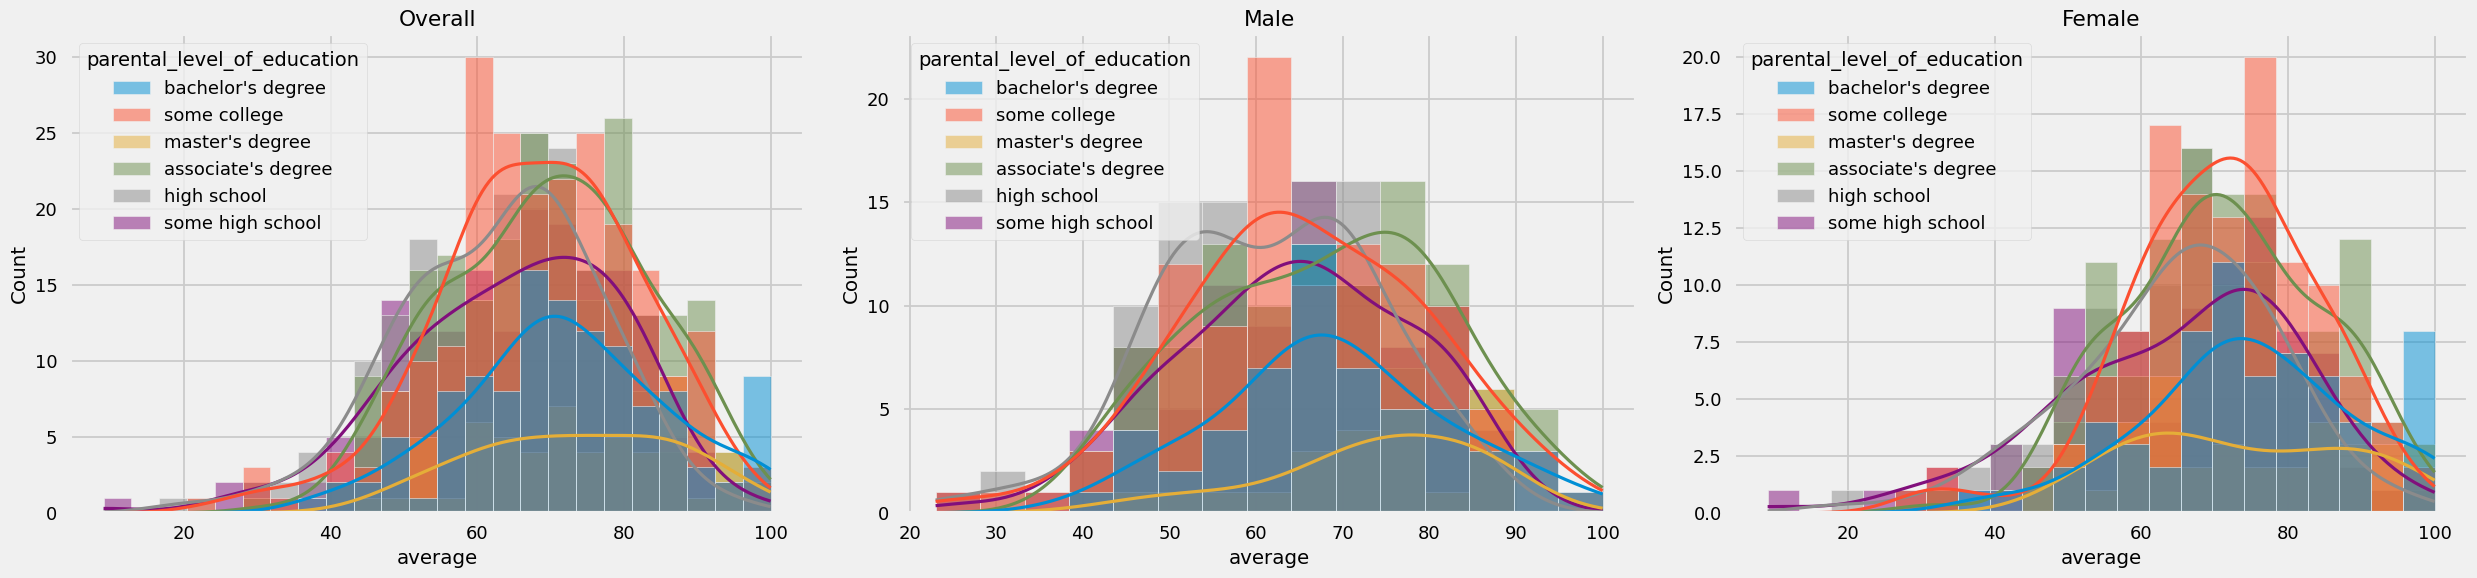

In [133]:
hue_order = df['parental_level_of_education'].unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education',hue_order=hue_order)
plt.title("Overall")
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education',hue_order=hue_order)
plt.title("Male")
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education',hue_order=hue_order)
plt.title("Female")
plt.tight_layout()
plt.show()

#### Insights
- In general parent`s level of education dont help students perform well in exam.

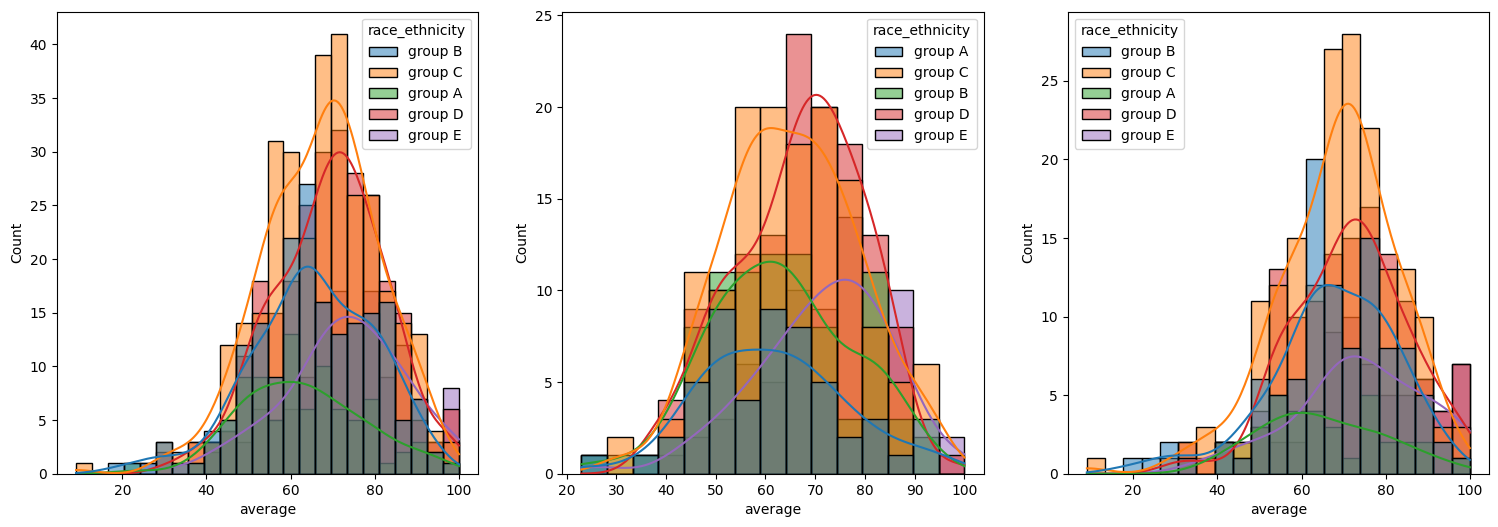

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

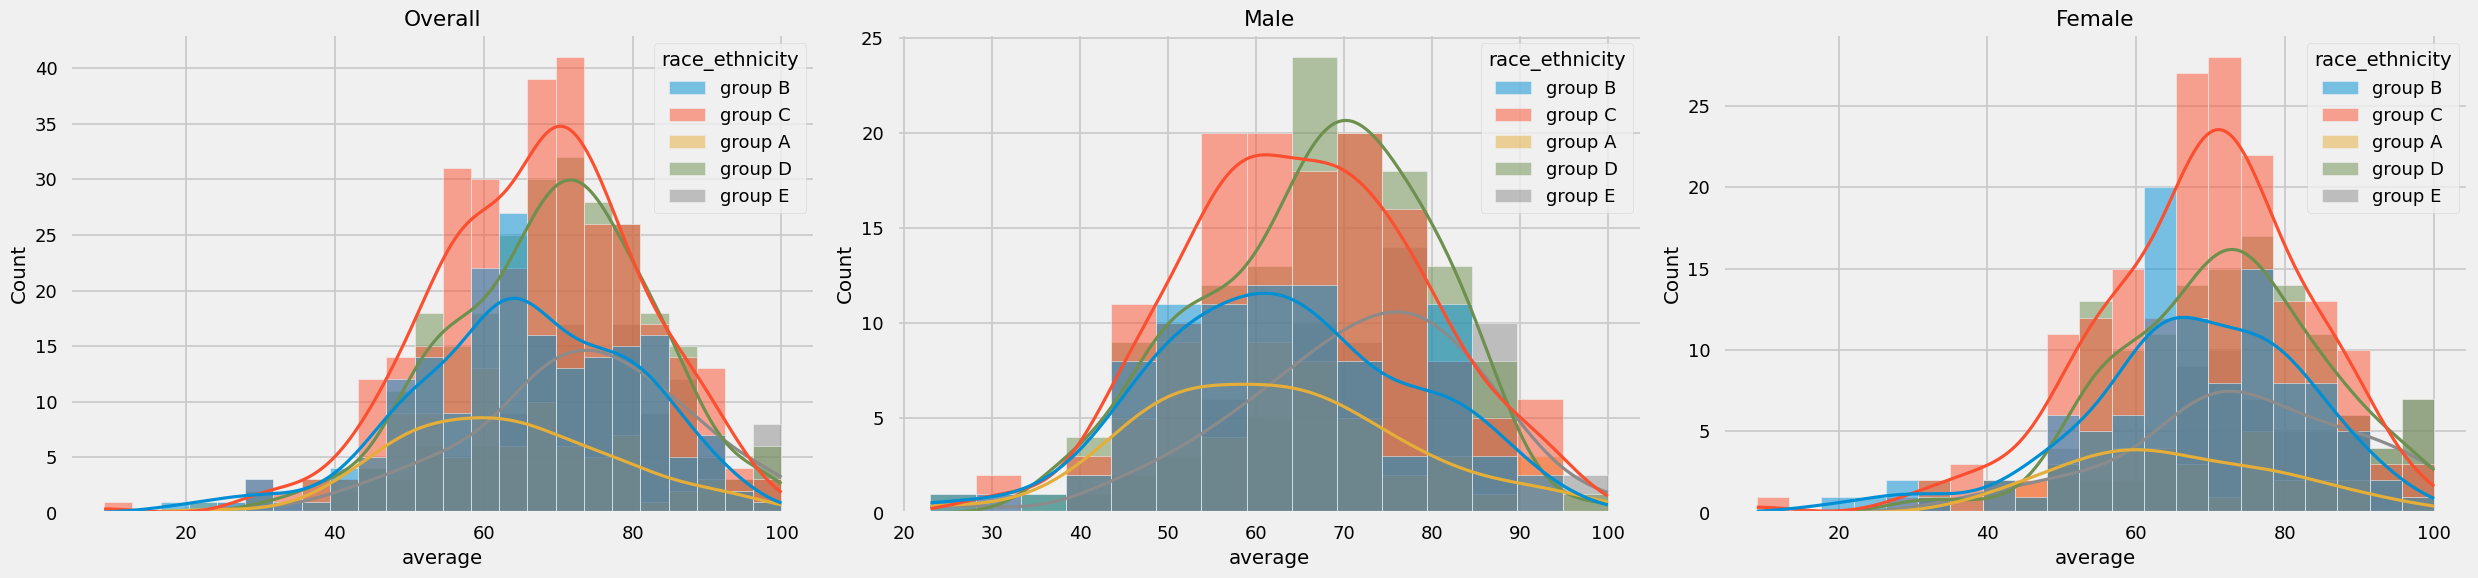

In [134]:
hue_order = df['race_ethnicity'].unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',hue_order=hue_order)
plt.title("Overall")
plt.subplot(132)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',hue_order=hue_order)
plt.title("Male")
plt.subplot(133)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',hue_order=hue_order)
plt.title("Female")
plt.tight_layout()
plt.show()

#### Insights
- Students of group A and group B tend to perform poorly in exam.
- Students of group A and group B tend to perform poorly inexam irrespective of whether they are male or female.

#### 4.2 Maximum scoe of students in all three subjects

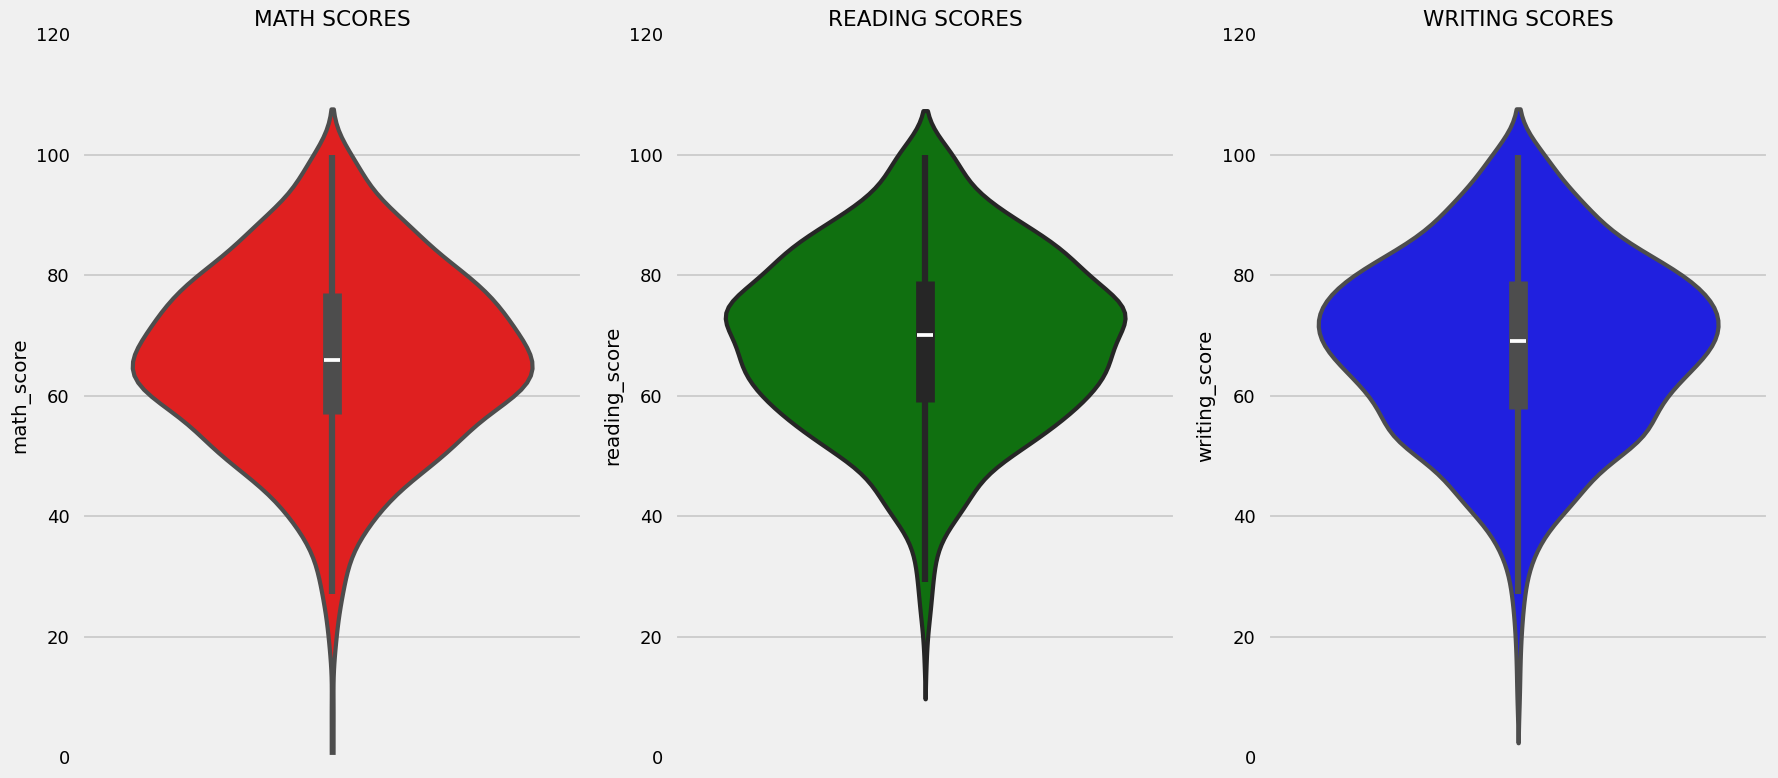

In [143]:
plt.figure(figsize=(18,8))
plt.subplot(131).set_ylim(0, 120)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3,scale='count')
plt.subplot(132).set_ylim(0, 120)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3,scale='count')
plt.subplot(133).set_ylim(0, 120)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3,scale='count')
plt.tight_layout()
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Reading whereas in Maths and Writing most of them score from 50-80 

#### 4.3 Multivariate analysis using pieplot

In [162]:
# plt.rcParams['figure.figsize'] = (30, 12)

# plt.subplot(1, 5, 1)
# size = df['gender'].value_counts()
# labels = 'Female', 'Male'
# color = ['red','green']


# plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
# plt.title('Gender', fontsize = 20)
# plt.axis('off')



# plt.subplot(1, 5, 2)
# size = df['race_ethnicity'].value_counts()
# labels = 'Group C', 'Group D','Group B','Group E','Group A'
# color = ['red', 'green', 'blue', 'cyan','orange']

# plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
# plt.title('Race/Ethnicity', fontsize = 20)
# plt.axis('off')


# plt.subplot(1, 5, 3)
# size = df['lunch'].value_counts()
# labels = 'Standard', 'Free'
# color = ['red','green']

# plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
# plt.title('Lunch', fontsize = 20)
# plt.axis('off')


# plt.subplot(1, 5, 4)
# size = df['test_preparation_course'].value_counts()
# labels = 'None', 'Completed'
# color = ['red','green']

# plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
# plt.title('Test Course', fontsize = 20)
# plt.axis('off')


# plt.subplot(1, 5, 5)
# size = df['parental_level_of_education'].value_counts()
# labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
# color = ['red', 'green', 'blue', 'cyan','orange','grey']

# plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
# plt.title('Parental Education', fontsize = 20)
# plt.axis('off')


# plt.tight_layout()
# plt.grid()

# plt.show()




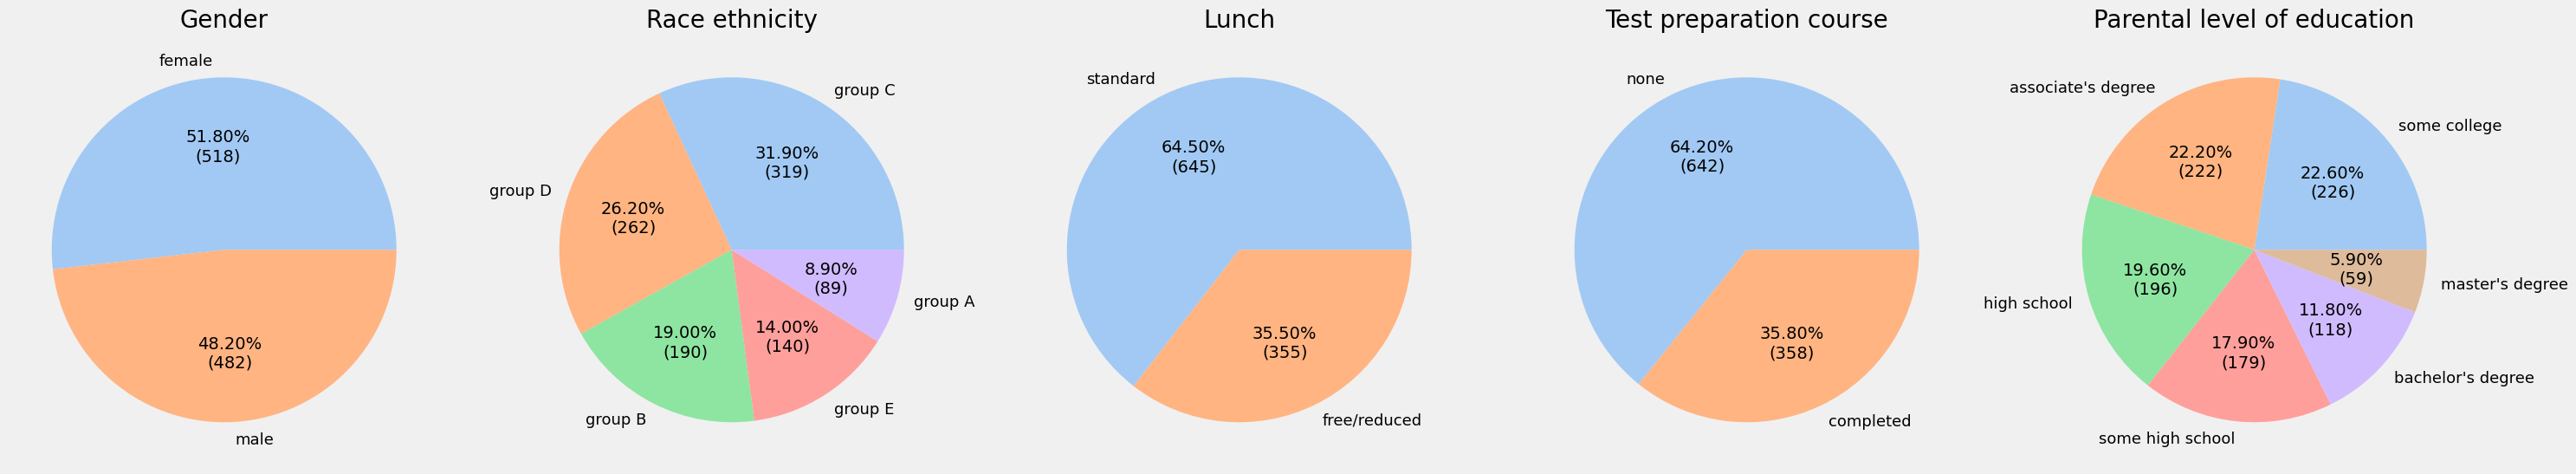

In [161]:
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct*total/100.0))
        return '{:.2f}%\n({:d})'.format(pct, count)
    return my_autopct

# Set up the figure and subplots
plt.figure(figsize=(30, 12))

for i, column in enumerate(columns_of_interest, start=1):
    plt.subplot(1, len(columns_of_interest), i)
    
    # Get the size and labels dynamically, sorted in descending order
    size = df[column].value_counts().sort_values(ascending=False)
    labels = size.index.tolist()  # Extract unique values as labels
    
    # Generate a color palette
    color = sns.color_palette("pastel", len(labels))  # Change "hsv" to any other palette name if desired
    
    # Plot the pie chart
    plt.pie(size, colors=color, labels=labels, autopct=autopct_format(size))
    plt.title(column.capitalize().replace('_', ' '), fontsize=20)
    plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()

#### Insights
- Number of Male and Female students are almost equal
- Number of students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is 'Some College' is greater followed closely by 'Associate`s Degree'

#### 4.4 Feature wise Visualization

#### 4.4.1 Gender Column
- How is distribution of Gender ?
- Has gender any impact on student`s performance ? 

#### Univariate Analysis (How is distribution of Gender ?)

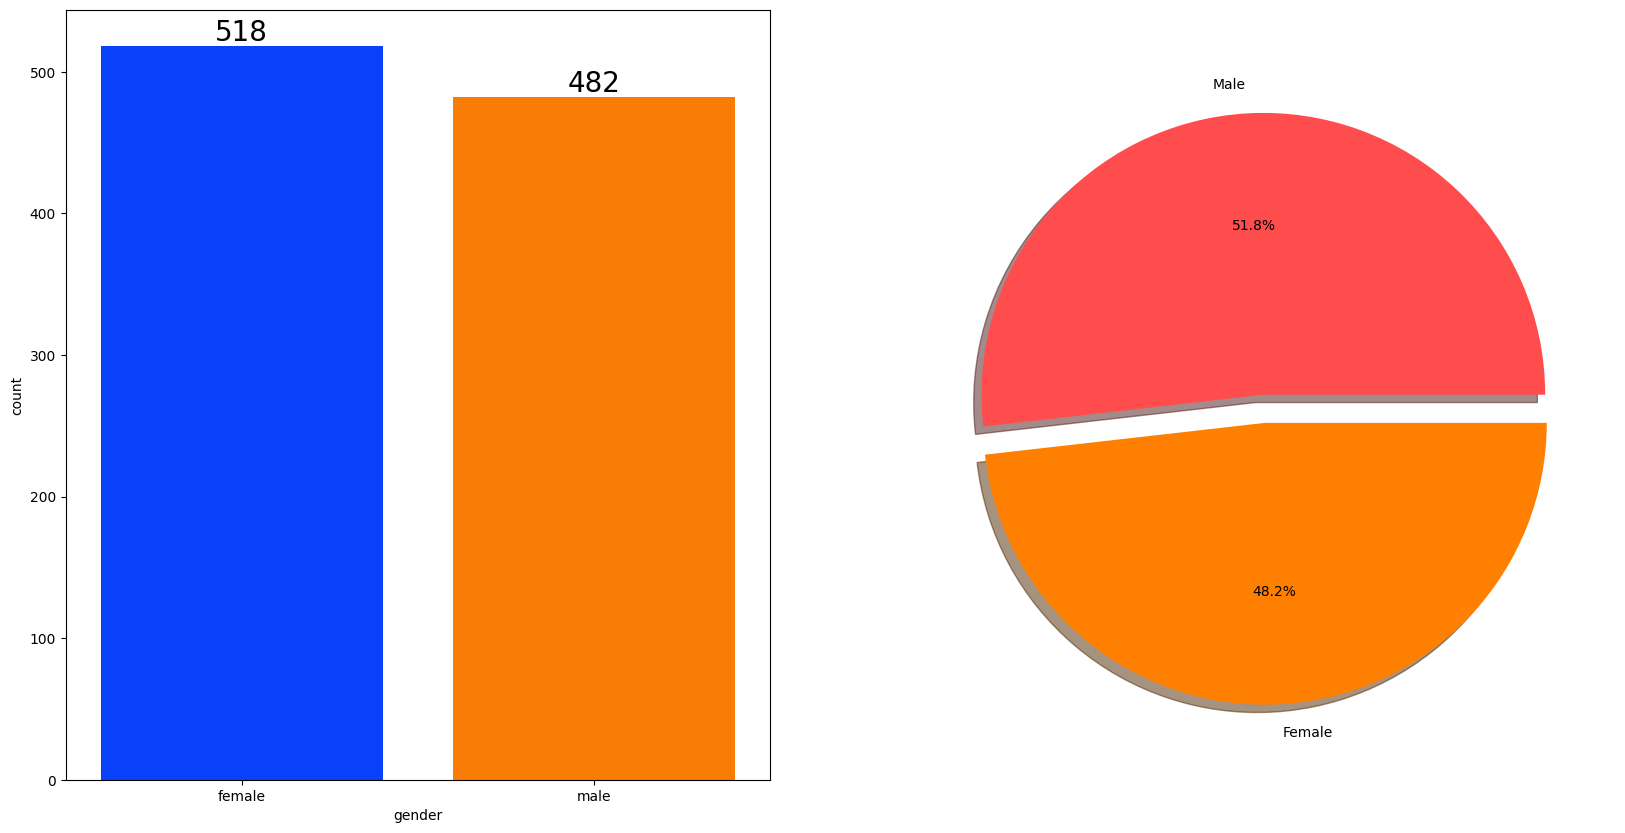

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- gender has balanced data with female students 518(48%) and male students 482(52%)

#### Bivariate Analysis (has gender any impact on student`s performance)

In [44]:
numeric_cols = df.select_dtypes(include=['number']).columns
gender_group = df.groupby('gender')[numeric_cols].mean()
print(gender_group)

        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


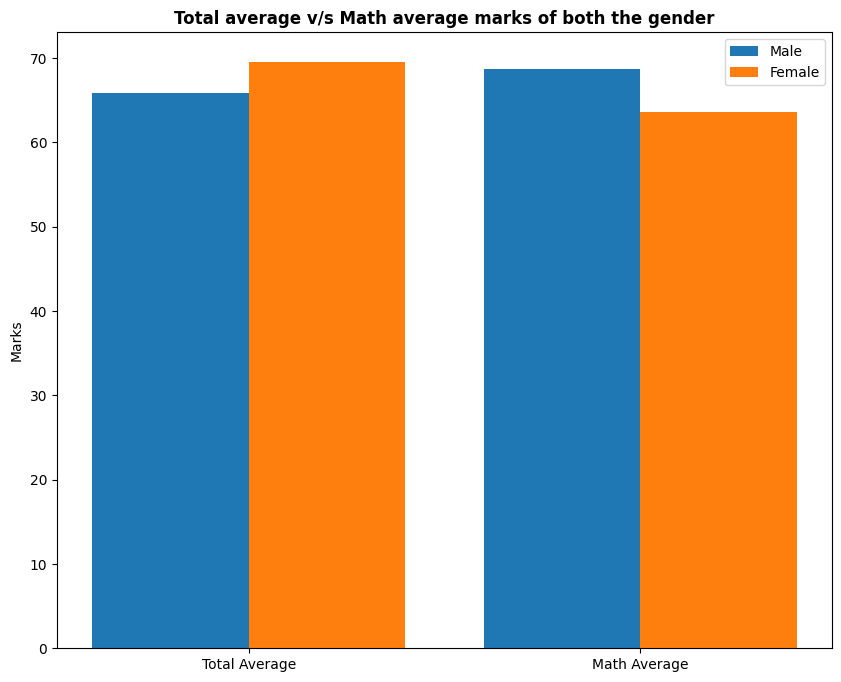

In [47]:
plt.figure(figsize=(10,8))
X=['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the gender",fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average females have better overall score than men.
- wheras males have scored higher in Maths

#### 4.4.2 Race/Ethnicity column
- how is group wise distribution ?
- has Race/Ethnicity any impact on student`s performance ?

#### Univariatee Analysis (how is group wise distribution?)

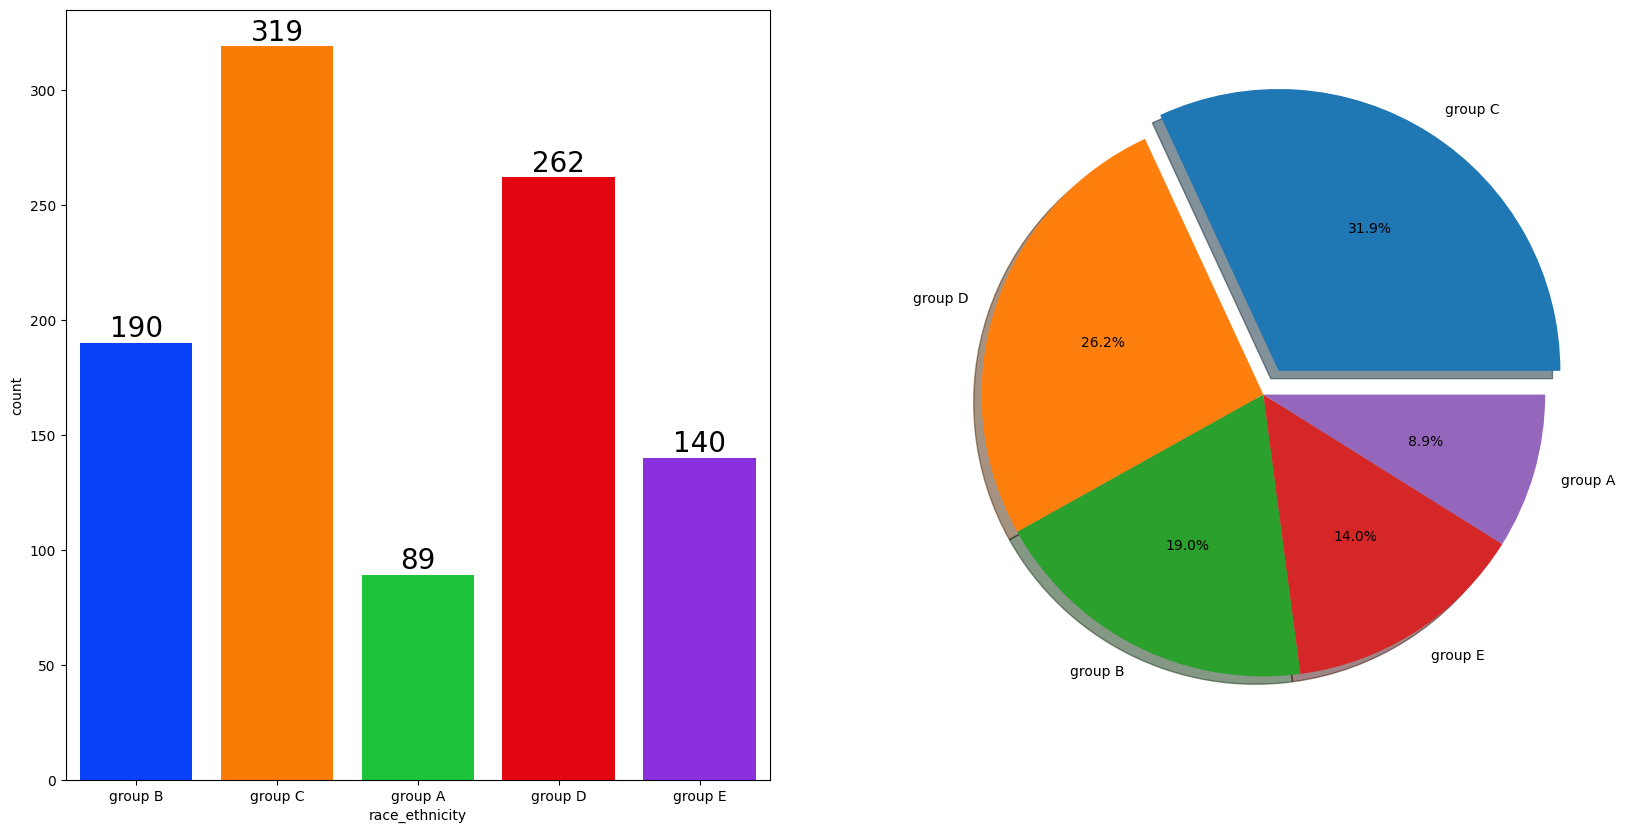

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights
- Most of the students belong from group C/group D.
- Loweest number of students belong to group A.

#### Bivaiate Analysis (has Race/Ethnicity any impact on student`s performance?)

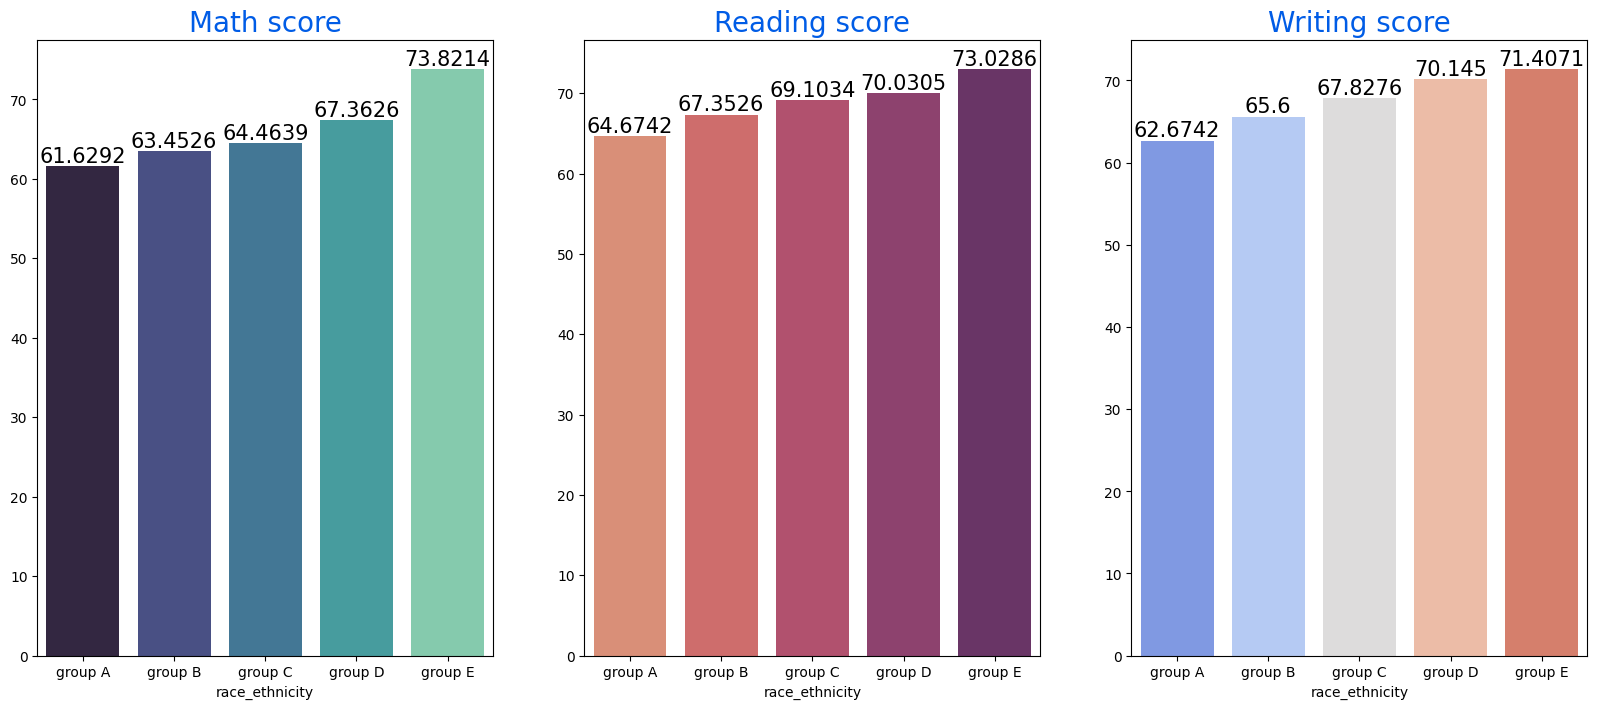

In [53]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.

#### 4.4.3 Parental level of education column
- what is educational backgroud of student`s parent?
- has parental education any impact on student`s performance?

#### Univariate Analysis (what is educational background of student`s parent?)

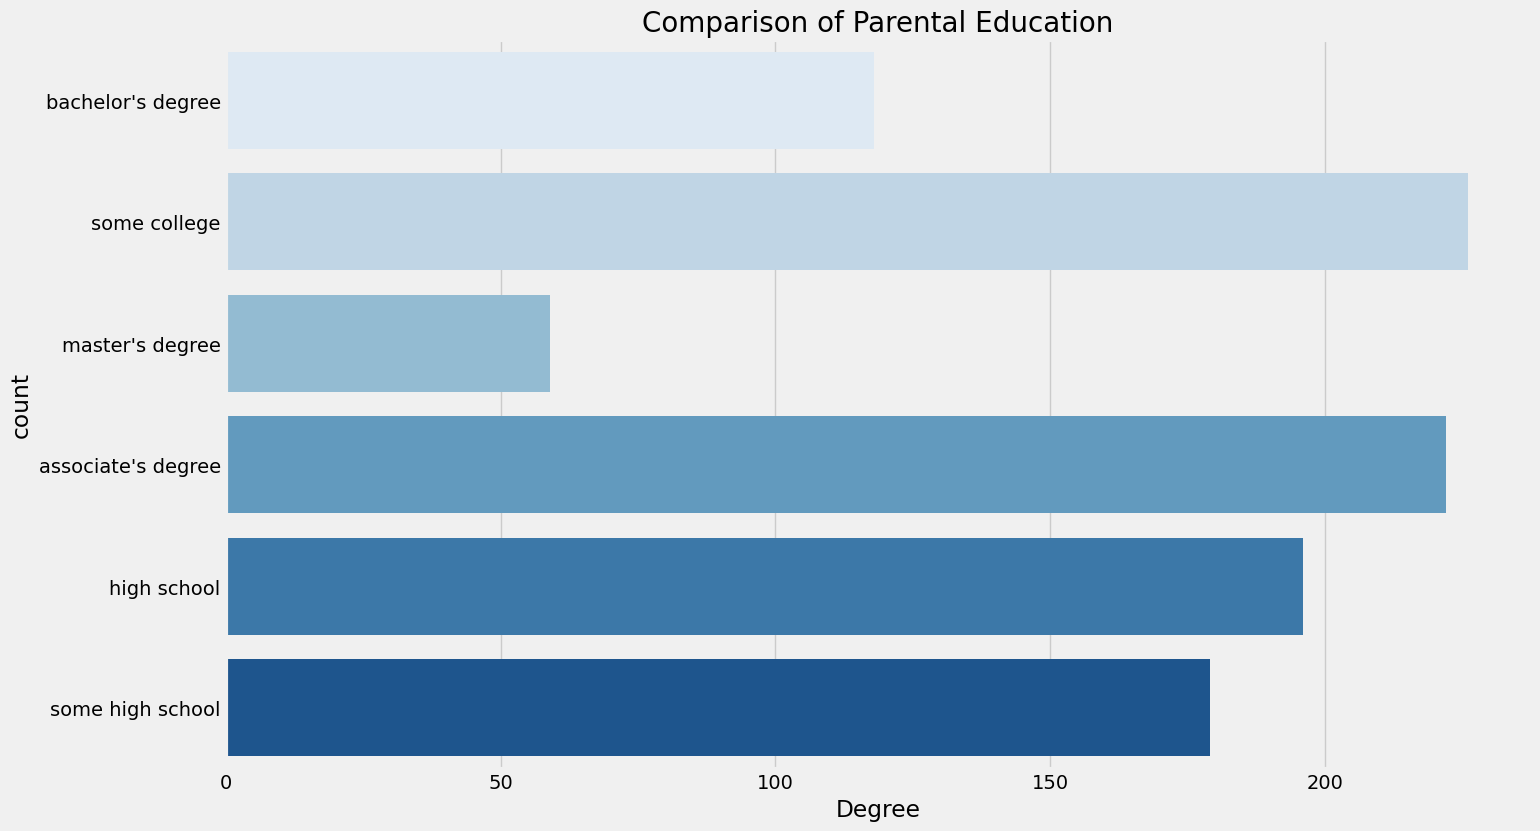

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
- Largest number of parents are from some collage.

#### Bivariate Analysis (has parental education any impact on student`s performance?)

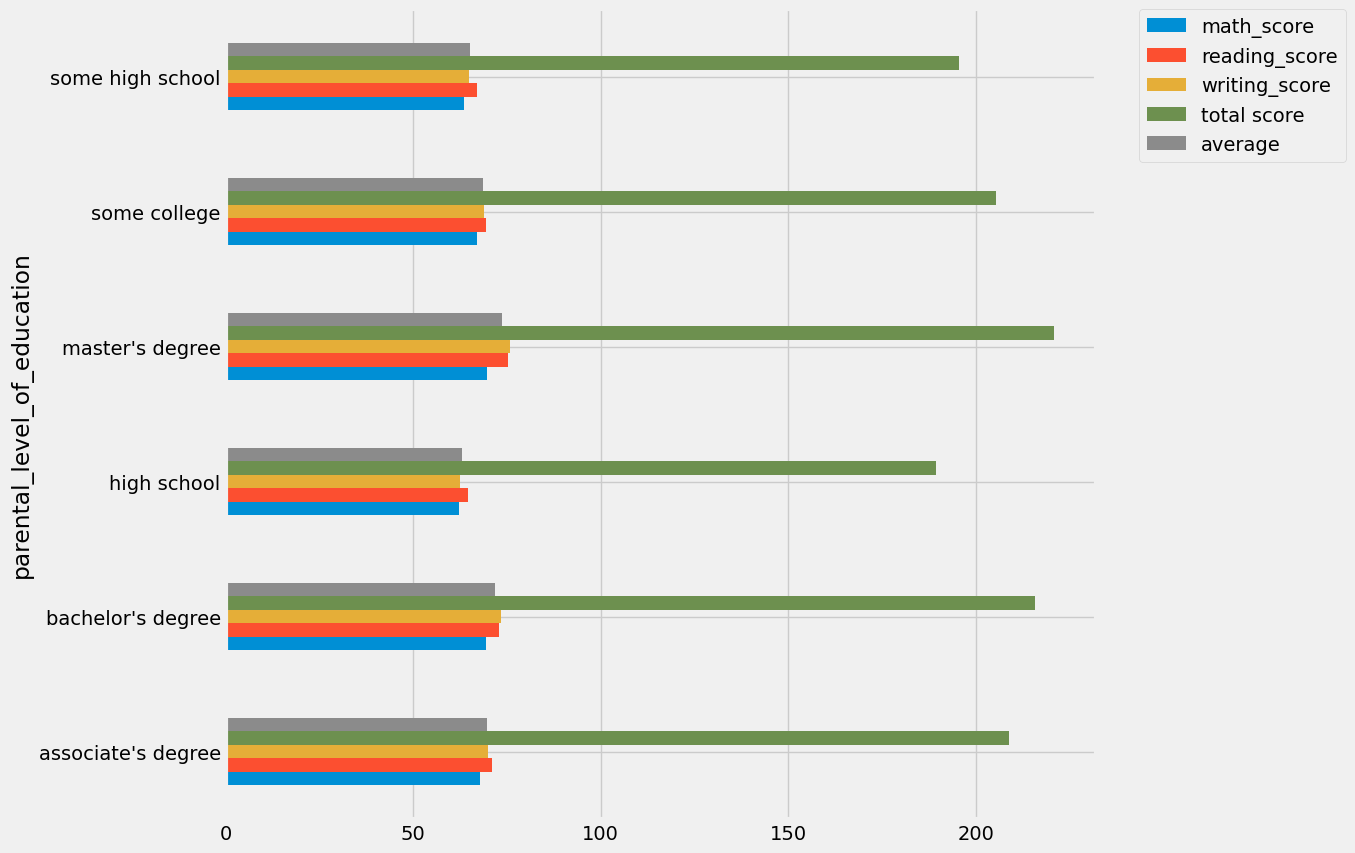

In [58]:
numeric_cols = df.select_dtypes(include=['number']).columns
df.groupby('parental_level_of_education')[numeric_cols].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- the score of students whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 Lunch column
- which type of lunch is most common among students?
- what is the effect of lunch type on test results?

#### Univariate Analysis (which type of lunch is most common among students?)

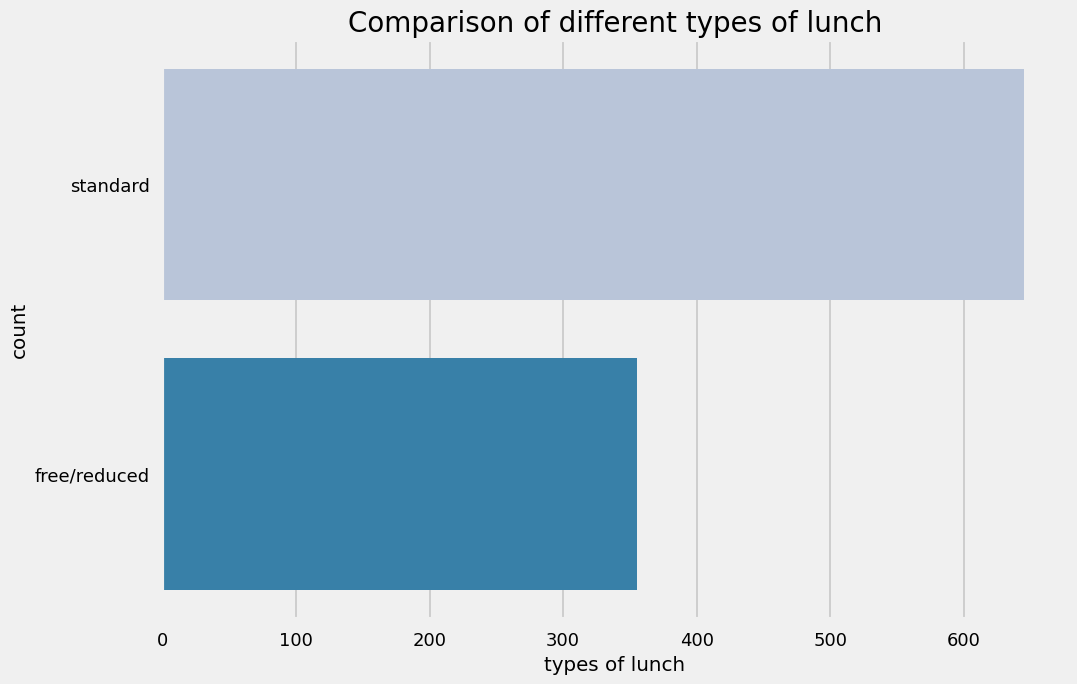

In [59]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights
- students preferred Standard lunch over Free lunch

#### Bivariate Analysis (what is the effect of lunch type on test results?)

<Axes: xlabel='lunch', ylabel='writing_score'>

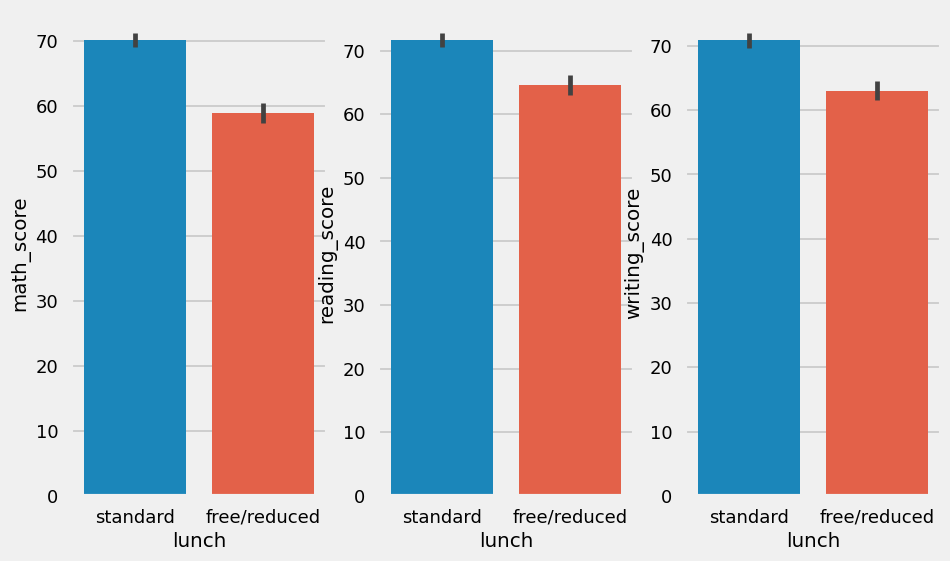

In [96]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='lunch', y='math_score', data=df, hue='lunch')

plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading_score', data=df, hue='lunch')

plt.subplot(1, 3, 3)
sns.barplot(x='lunch', y='writing_score', data=df, hue='lunch')

#### Insights
- Students who got Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 Test Preparation Course column
- has Test Preparation Course any impact on student`s performance

#### Bivariate Analysis (has Test Preparation Course any impact on student`s performance?)

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

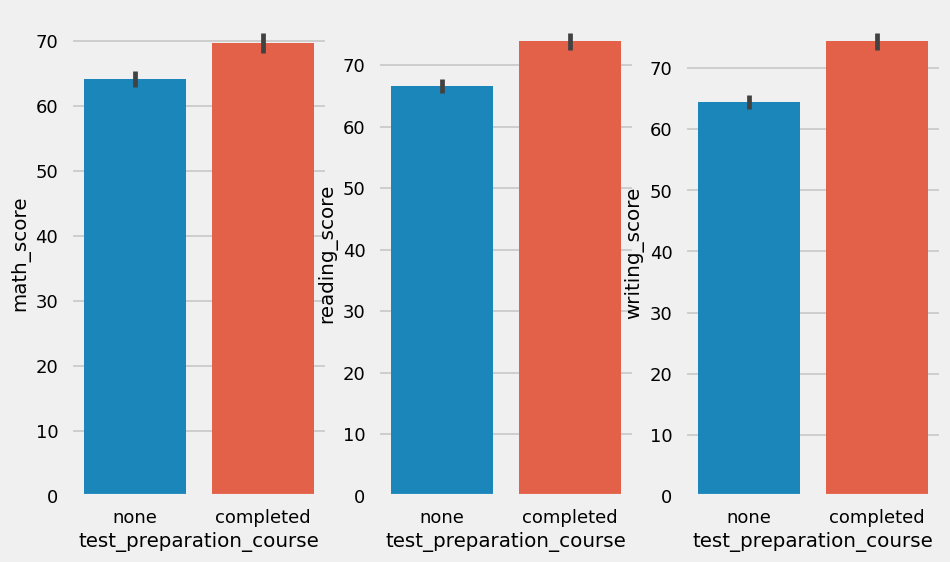

In [97]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='test_preparation_course', y='math_score', data=df,hue='test_preparation_course')

plt.subplot(1, 3, 2)
sns.barplot(x='test_preparation_course', y='reading_score', data=df,hue='test_preparation_course')

plt.subplot(1, 3, 3)
sns.barplot(x='test_preparation_course', y='writing_score', data=df,hue='test_preparation_course')

#### Insights
- Students who have completed Test preparation course have scores higher in all 3 categories than those who havent

#### 4.4.6 Checking Outliers

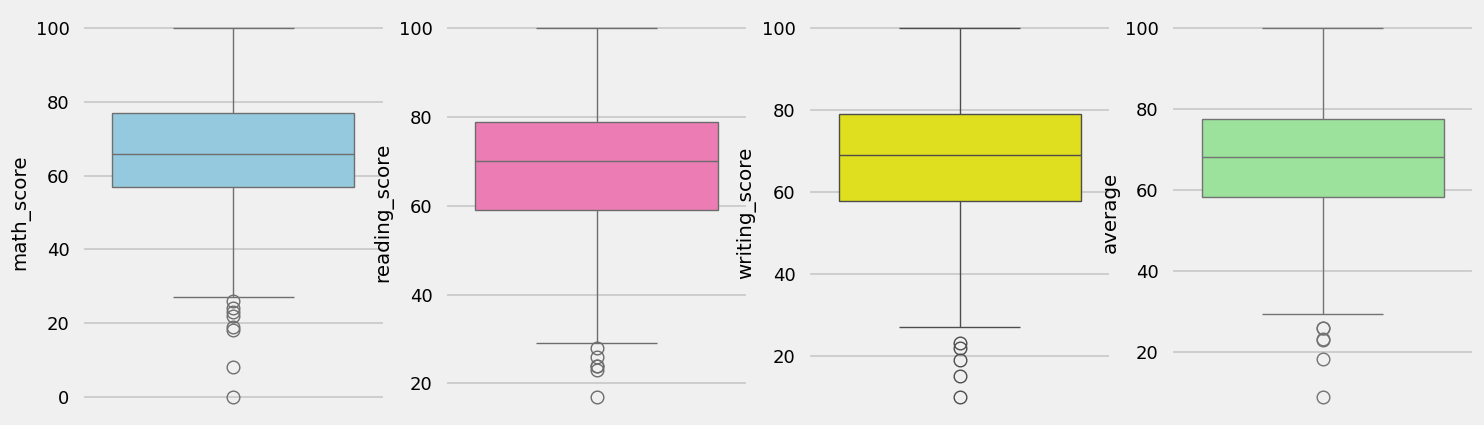

In [163]:
plt.subplots(figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Multivariate Analysis using Pairpolt

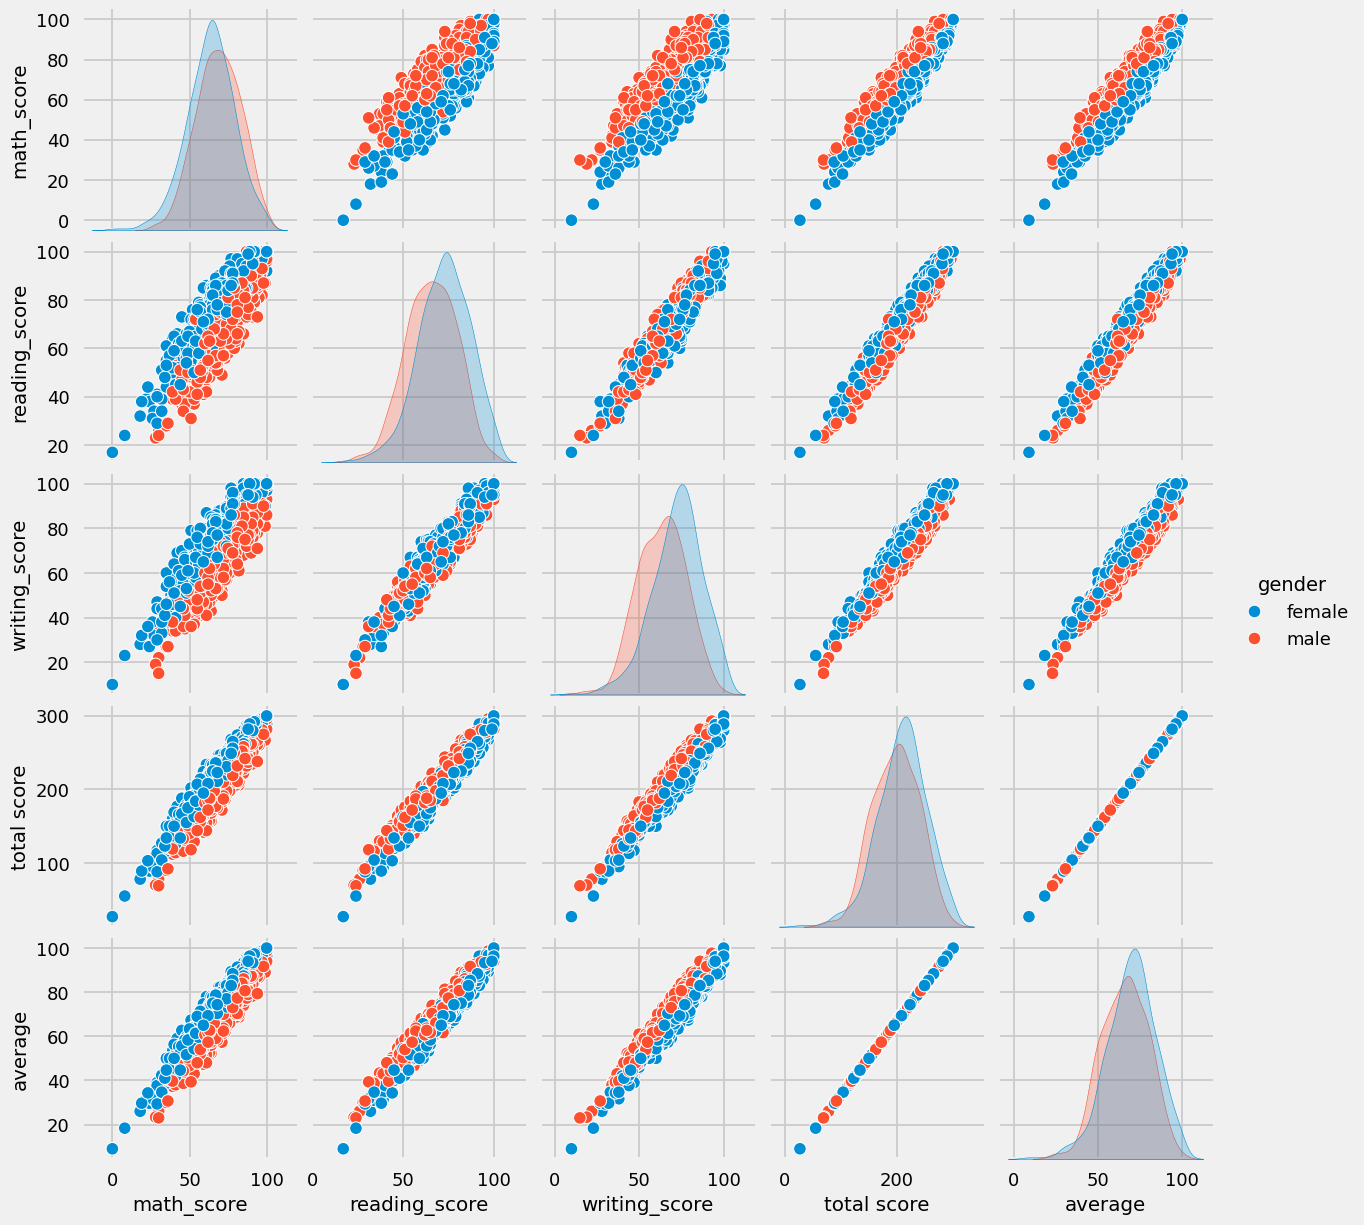

In [101]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights
- from the above plot we can observe, all the scores increase linearly with each other.

#### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Student's Performance is related with test preparation course.
- Finishing preparation course is benefitial.